In [8]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

words = open('names.txt', 'r').read().splitlines()

In [2]:
# play with torch first

C = torch.rand((5, 3, 2))
# C
# C[1][2]
# C[1][1][1].item()
# C[[1,2,3]]
C[[[0,1], [1,2]]]

tensor([[0.7379, 0.9953],
        [0.8350, 0.2491]])

In [59]:
a = torch.arange(24)
# a
# a.view(24)
# a.view(2, 12
# a.view(12, 2
a.view(-1, 3)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23]])

In [61]:
# lecture stuff

In [3]:
# index words
chars = sorted(list(set(''.join(words))))
stoi = {ch: i + 1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}

In [4]:
# build the dataset
# context length: how many characters do we take to predict the next one?
import random
block_size = 3


def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y


random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [7]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters) 

11897

In [9]:
lossi = []
stepi = []

for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  stepi.append(i)
  lossi.append(loss.log10().item())

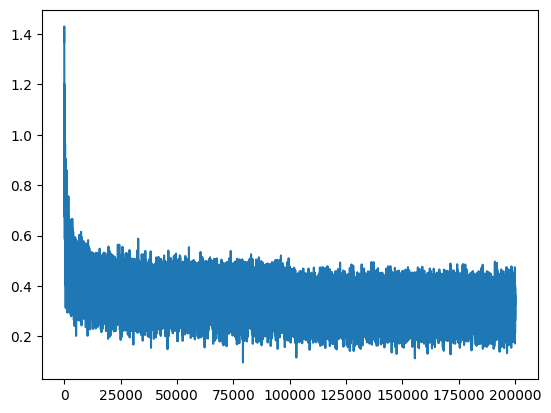

In [10]:
plt.plot(stepi, lossi)

In [11]:
# final loss on train
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1141, grad_fn=<NllLossBackward0>)

In [17]:
emb.view(-1, 30)

tensor([[-0.2951,  0.2103,  0.4496, -0.5844, -0.2652,  0.2515,  0.5455, -0.2425,
         -0.9737, -0.3720, -0.9375, -0.0600, -0.8323, -1.0021,  0.3123,  0.4126,
          0.8730,  0.0133,  0.7841,  1.1613,  0.0515,  0.4754, -1.0388, -0.2437,
          0.5117,  2.1058,  1.1034, -1.1449,  0.1043, -0.7936]],
       grad_fn=<ViewBackward0>)

In [13]:
# final loss on dev
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1560, grad_fn=<NllLossBackward0>)

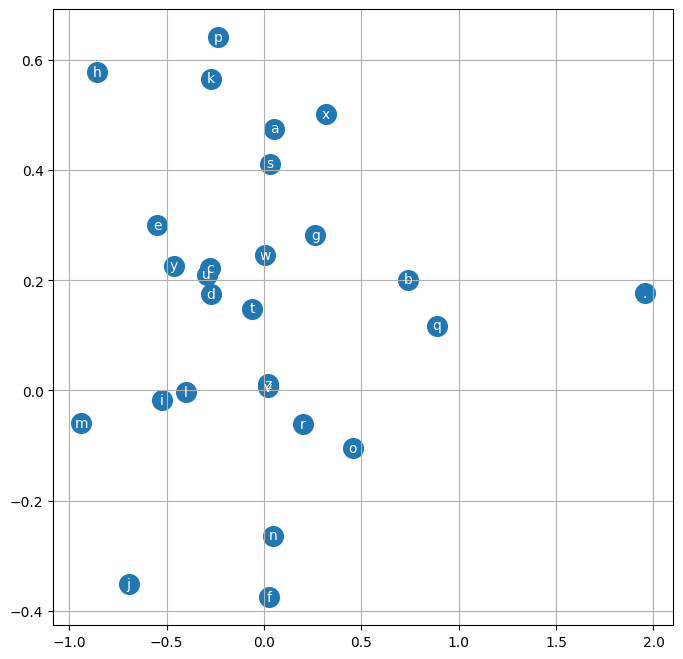

In [14]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [22]:
context = [0] * block_size

g = torch.Generator().manual_seed(2147483647 + 1)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

sanjahno.
malea.
emmena.
eide.
alah.
carali.
ubasia.
casham.
jari.
caylonna.
karyan.
edhett.
zuhacour.
ahiyah.
kalynn.
tyah.
kamonis.
isa.
audyuon.
issietter.
